# Quickstart

Let's run our first CFD simulation using JAX-Fluids.

JAX-Fluids has three main objects:
- **InputManager**
- **InitializationManager**
- **SimulationManager**

Let's import them from the jaxfluids Python package.

In [1]:
from jaxfluids import InputManager, InitializationManager, SimulationManager

In JAX-Fluids, all physical properties of your simulation are defined in a **case_setup.json file**. All numerical properties of your simulation are defined in a **numerical_setup.json file**. The InputManager reads both of these setup files, processes their contents, and runs sanity checks. 

Let's instantiate a InputManager object by passing a **case_setup.json file** and a **numerical_setup.json file** to the InputManager.

In [17]:
import json
case_setup_dict = json.load(open("linear_advection.json", "r"))

#input_manager = InputManager("linear_advection.json", "numerical_setup.json")
input_manager = InputManager(case_setup_dict, "numerical_setup.json")

We can now create an instance of an InitializationManager and an instance of a SimulationManager by passing the input_manager object.

In [18]:
init_manager = InitializationManager(input_manager)
sim_manager = SimulationManager(input_manager)

The simulation can be initialized by running the **.initialization()** method of the InitializationManager. The return value is a JAX-Fluids data type called JaxFluidsBuffer, which contains all relevant data of your simulation.

In [19]:
jxf_buffers = init_manager.initialization()

The simulation can be started by passing the jxf_buffers object to the **.simulate()** of the SimulationManager.

In [20]:
sim_manager.simulate(jxf_buffers)

*------------------------------------------------------------------------------*
*                                                                              *
*                                                                              *
*          _     _    __  __        _____  _      _   _  ___  ____   ____      *
*         | |   / \   \ \/ /       |  ___|| |    | | | ||_ _||  _ \ / ___|     *
*      _  | |  / _ \   \  /  _____ | |_   | |    | | | | | | | | | |\___ \     *
*     | |_| | / ___ \  /  \ |_____||  _|  | |___ | |_| | | | | |_| | ___) |    *
*      \___/ /_/   \_\/_/\_\       |_|    |_____| \___/ |___||____/ |____/     *
*                                                                              *
*                                By BB - ML@AER                                *
*                                                                              *
*------------------------------------------------------------------------------*
* JAX-FLUIDS -              

True

A JAX-Fluids simulation will create a results folder with a case-specific folder containing all results. This case-specific folder contains copies of the json-setup files, the output.log, and a domain folder. All field data is stored in the domain folder in the h5-format.

Let's load the data using the **load_data()** function from the jaxfluids_postprocess library.

In [47]:
from jaxfluids_postprocess import load_data
jxf_data = load_data(
    path="results/linear_advection-3",
    quantities=["density", "velocity", "pressure"],
)

Loading time snapshot 0.0000e+00
Loading time snapshot 1.0743e-01
Loading time snapshot 2.0692e-01
Loading time snapshot 3.0665e-01
Loading time snapshot 4.0659e-01
Loading time snapshot 5.0671e-01
Loading time snapshot 6.0700e-01
Loading time snapshot 7.0746e-01
Loading time snapshot 8.0806e-01
Loading time snapshot 9.0041e-01
Loading time snapshot 1.0013e+00
Loading time snapshot 1.1023e+00
Loading time snapshot 1.2034e+00
Loading time snapshot 1.3047e+00
Loading time snapshot 1.4060e+00
Loading time snapshot 1.5075e+00
Loading time snapshot 1.6007e+00
Loading time snapshot 1.7023e+00
Loading time snapshot 1.8041e+00
Loading time snapshot 1.9060e+00
Loading time snapshot 2.0080e+00


The **load_data** method returns a JaxFluidsData type. We will access its cell_centers member and its data member.

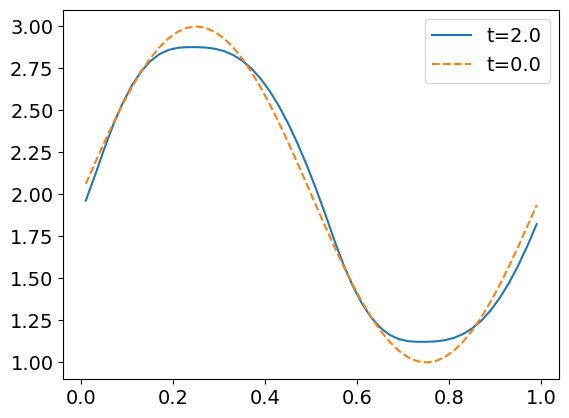

In [39]:
cell_centers = jxf_data.cell_centers
x, y, z = cell_centers
data = jxf_data.data
density = data["density"].squeeze()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, density[-1], label="t=2.0")
ax.plot(x, density[0], linestyle="--", label="t=0.0")
ax.legend()

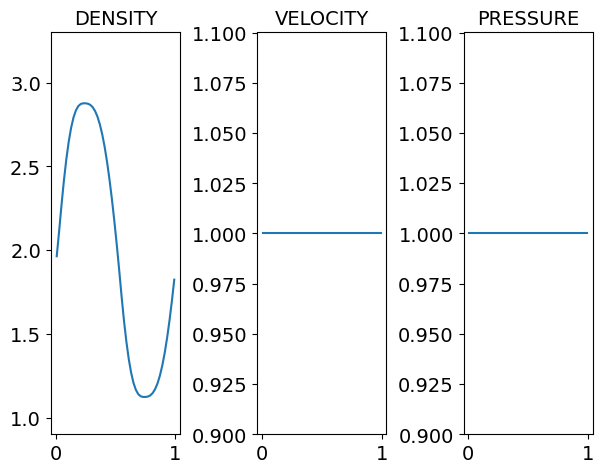

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: title={'center': 'DENSITY'}>,
        <Axes: title={'center': 'VELOCITY'}>,
        <Axes: title={'center': 'PRESSURE'}>], dtype=object),
  <matplotlib.lines.Line2D at 0x352d0f5d0>])

In [48]:
from jaxfluids_postprocess import create_1D_figure

data = jxf_data.data

data = {
    "density": data["density"],
    "velocity": data["velocity"][:,0],
    "pressure": data["pressure"],
}

create_1D_figure(
    data,
    cell_centers,
    nrows_ncols=(1,3),
    axis="x", axis_values=(0,0)
)
